In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr


In [2]:
# Import Dataset
# The dataset consist of 4 CSV files: customer, orders, product category, and product

df_customer = pd.read_csv('D:\RAKAMIN\INTERNSHIP\BANK MUAMALAT BI ANALYST\FINAL PROJECT BI MUAMALAT\FINAL PROJECT BI MUAMALAT\Customers.csv')
df_customer

,CustomerID,FirstName,LastName,CustomerEmail,CustomerPhone,CustomerAddress,CustomerCity,CustomerState,CustomerZip
0,1,Grazia,Rasmus,grasmusas@i2i.jp#mailto:grasmusas@i2i.jp#,(202) 577-2595,628 Buhler Junction,Washington,District of Columbia,20029
1,2,Bunny,Trevan,btrevanmj@wordpress.org#mailto:btrevanmj@wordp...,917-903-2827,52 Cascade Drive,Jamaica,New York,11436
2,3,Tracie,Grayston,tgrayston7k@pagesperso-orange.fr#mailto:tgrays...,404-868-2391,672 Comanche Way,Atlanta,Georgia,30343
3,4,Amerigo,Garrelts,agarrelts6e@oaic.gov.au#mailto:agarrelts6e@oai...,415-190-3290,8252 Village Green Hill,San Francisco,California,94177
4,5,Shea,Stronghill,sstronghillc1@google.nl#mailto:sstronghillc1@g...,432-775-7828,542 3rd Point,Midland,Texas,79705
...,...,...,...,...,...,...,...,...,...
2118,2119,Tedman,Stockings,tstockings94@opera.com#mailto:tstockings94@ope...,810-434-7886,406 Rigney Drive,Flint,Michigan,48550
2119,2120,Jackie,Johnes,jjohnesgq@ca.gov#mailto:jjohnesgq@ca.gov#,941-491-1065,19 Sunnyside Trail,North Port,Florida,34290
2120,2121,Dorella,Saxton,dsaxton96@cornell.edu#mailto:dsaxton96@cornell...,404-165-3184,48 Prairieview Crossing,Duluth,Georgia,30096
2121,2122,Rubia,Theuff,rtheuffem@sfgate.com#mailto:rtheuffem@sfgate.com#,814-232-6220,70 Vernon Junction,Erie,Pennsylvania,16522


In [3]:
df_order = pd.read_csv('D:\RAKAMIN\INTERNSHIP\BANK MUAMALAT BI ANALYST\FINAL PROJECT BI MUAMALAT\FINAL PROJECT BI MUAMALAT\Orders.csv')
df_order.tail()

,OrderID,DateOrder,CustomerID,ProdNumber,Quantity
3334,3335,2021-12-31,410,TV810,2
3335,3336,2021-12-31,520,RS707,5
3336,3337,2021-12-31,582,RK602,4
3337,3338,2021-12-31,1225,TV810,5
3338,3340,2021-11-15,5,EB508,2


In [4]:
# Deleted inconsistent data from the datasheet. 
# Specifically, in the last rows of the order dataset, there were missing values, such as the number '3339,' and inconsistent date orders

df_orders = df_order.drop([3338], axis = 0)
df_orders.tail()

,OrderID,DateOrder,CustomerID,ProdNumber,Quantity
3333,3334,2021-12-31,625,DS302,5
3334,3335,2021-12-31,410,TV810,2
3335,3336,2021-12-31,520,RS707,5
3336,3337,2021-12-31,582,RK602,4
3337,3338,2021-12-31,1225,TV810,5


In [5]:
df_product = pd.read_csv('D:\RAKAMIN\INTERNSHIP\BANK MUAMALAT BI ANALYST\FINAL PROJECT BI MUAMALAT\FINAL PROJECT BI MUAMALAT\Products.csv')
df_product.head()

,ProdNumber,ProdName,Category,Price
0,BP101,All Eyes Drone Blueprint,1,9.99
1,BP102,Bsquare Robot Blueprint,1,8.99
2,BP104,Cat Robot Blueprint,1,4.99
3,BP105,Creature Robot Arms Blueprint,1,12.00
4,BP106,Hexacopter Drone Blueprint,1,8.99


In [6]:
df_productcategory = pd.read_csv('D:\RAKAMIN\INTERNSHIP\BANK MUAMALAT BI ANALYST\FINAL PROJECT BI MUAMALAT\FINAL PROJECT BI MUAMALAT\ProductCategory.csv')
df_productcategory.head()

,CategoryID,CategoryName,CategoryAbbreviation
0,1,Blueprints,BP
1,2,Drone Kits,DK
2,3,Drones,DS
3,4,eBooks,EB
4,5,Robot Kits,RK


In [7]:
# merge data with inner
df_1 = df_order.merge(df_customer, on = 'CustomerID', how = 'inner')
df_2 = df_1.merge(df_product, on = 'ProdNumber', how = 'inner')
df = df_2.merge(df_productcategory,
                left_on = 'Category',
                right_on = 'CategoryID',
                how = 'inner')
df.head()

,OrderID,DateOrder,CustomerID,ProdNumber,Quantity,FirstName,LastName,CustomerEmail,CustomerPhone,CustomerAddress,CustomerCity,CustomerState,CustomerZip,ProdName,Category,Price,CategoryID,CategoryName,CategoryAbbreviation
0,1,2020-01-01,1866,EB514,2,Farrand,Vasler,fvaslerqt@comsenz.com#mailto:fvaslerqt@comsenz...,601-786-0195,134 Melrose Pass,Jackson,Mississippi,39216,Polar Robots,4,23.99,4,eBooks,EB
1,58,2020-01-12,46,EB514,4,Dill,Gyrgorcewicx,dgyrgorcewicx5@1und1.de#mailto:dgyrgorcewicx5@...,918-471-3145,771 Corry Court,Tulsa,Oklahoma,74116,Polar Robots,4,23.99,4,eBooks,EB
2,63,2020-01-13,1101,EB514,1,Lotti,Cridlon,lcridlonkj@sina.com.cn#mailto:lcridlonkj@sina....,217-724-8971,30 Rieder Avenue,Springfield,Illinois,62723,Polar Robots,4,23.99,4,eBooks,EB
3,73,2020-01-15,700,EB514,3,Roobbie,Dermot,rdermotm7@spotify.com#mailto:rdermotm7@spotify...,202-245-2944,5977 Bunker Hill Crossing,Washington,District of Columbia,20029,Polar Robots,4,23.99,4,eBooks,EB
4,1764,2021-01-16,1052,EB514,2,Row,Hebner,rhebner7v@hugedomains.com#mailto:rhebner7v@hug...,714-296-4939,91 Ilene Pass,Irvine,California,92717,Polar Robots,4,23.99,4,eBooks,EB


In [8]:
# Calculate the total sales

df['TotalSales'] = df['Quantity']*df['Price']
df.head()

,OrderID,DateOrder,CustomerID,ProdNumber,Quantity,FirstName,LastName,CustomerEmail,CustomerPhone,CustomerAddress,CustomerCity,CustomerState,CustomerZip,ProdName,Category,Price,CategoryID,CategoryName,CategoryAbbreviation,TotalSales
0,1,2020-01-01,1866,EB514,2,Farrand,Vasler,fvaslerqt@comsenz.com#mailto:fvaslerqt@comsenz...,601-786-0195,134 Melrose Pass,Jackson,Mississippi,39216,Polar Robots,4,23.99,4,eBooks,EB,47.98
1,58,2020-01-12,46,EB514,4,Dill,Gyrgorcewicx,dgyrgorcewicx5@1und1.de#mailto:dgyrgorcewicx5@...,918-471-3145,771 Corry Court,Tulsa,Oklahoma,74116,Polar Robots,4,23.99,4,eBooks,EB,95.96
2,63,2020-01-13,1101,EB514,1,Lotti,Cridlon,lcridlonkj@sina.com.cn#mailto:lcridlonkj@sina....,217-724-8971,30 Rieder Avenue,Springfield,Illinois,62723,Polar Robots,4,23.99,4,eBooks,EB,23.99
3,73,2020-01-15,700,EB514,3,Roobbie,Dermot,rdermotm7@spotify.com#mailto:rdermotm7@spotify...,202-245-2944,5977 Bunker Hill Crossing,Washington,District of Columbia,20029,Polar Robots,4,23.99,4,eBooks,EB,71.97
4,1764,2021-01-16,1052,EB514,2,Row,Hebner,rhebner7v@hugedomains.com#mailto:rhebner7v@hug...,714-296-4939,91 Ilene Pass,Irvine,California,92717,Polar Robots,4,23.99,4,eBooks,EB,47.98


In [9]:
df['Name'] = df['FirstName'] + ' ' + df['LastName']
df.head()

,OrderID,DateOrder,CustomerID,ProdNumber,Quantity,FirstName,LastName,CustomerEmail,CustomerPhone,CustomerAddress,...,CustomerState,CustomerZip,ProdName,Category,Price,CategoryID,CategoryName,CategoryAbbreviation,TotalSales,Name
0,1,2020-01-01,1866,EB514,2,Farrand,Vasler,fvaslerqt@comsenz.com#mailto:fvaslerqt@comsenz...,601-786-0195,134 Melrose Pass,...,Mississippi,39216,Polar Robots,4,23.99,4,eBooks,EB,47.98,Farrand Vasler
1,58,2020-01-12,46,EB514,4,Dill,Gyrgorcewicx,dgyrgorcewicx5@1und1.de#mailto:dgyrgorcewicx5@...,918-471-3145,771 Corry Court,...,Oklahoma,74116,Polar Robots,4,23.99,4,eBooks,EB,95.96,Dill Gyrgorcewicx
2,63,2020-01-13,1101,EB514,1,Lotti,Cridlon,lcridlonkj@sina.com.cn#mailto:lcridlonkj@sina....,217-724-8971,30 Rieder Avenue,...,Illinois,62723,Polar Robots,4,23.99,4,eBooks,EB,23.99,Lotti Cridlon
3,73,2020-01-15,700,EB514,3,Roobbie,Dermot,rdermotm7@spotify.com#mailto:rdermotm7@spotify...,202-245-2944,5977 Bunker Hill Crossing,...,District of Columbia,20029,Polar Robots,4,23.99,4,eBooks,EB,71.97,Roobbie Dermot
4,1764,2021-01-16,1052,EB514,2,Row,Hebner,rhebner7v@hugedomains.com#mailto:rhebner7v@hug...,714-296-4939,91 Ilene Pass,...,California,92717,Polar Robots,4,23.99,4,eBooks,EB,47.98,Row Hebner


In [10]:
# Convert date order to datetime

df['DateOrder'] = pd.to_datetime(df['DateOrder'], utc = False)
df['DateOrder']

0      2020-01-01
1      2020-01-12
2      2020-01-13
3      2020-01-15
4      2021-01-16
          ...    
3334   2021-06-01
3335   2021-06-28
3336   2021-06-30
3337   2021-07-05
3338   2021-10-30
Name: DateOrder, Length: 3339, dtype: datetime64[ns]

In [11]:
# Add a column for year

df['Year'] = df['DateOrder'].dt.year
df.head()

,OrderID,DateOrder,CustomerID,ProdNumber,Quantity,FirstName,LastName,CustomerEmail,CustomerPhone,CustomerAddress,...,CustomerZip,ProdName,Category,Price,CategoryID,CategoryName,CategoryAbbreviation,TotalSales,Name,Year
0,1,2020-01-01,1866,EB514,2,Farrand,Vasler,fvaslerqt@comsenz.com#mailto:fvaslerqt@comsenz...,601-786-0195,134 Melrose Pass,...,39216,Polar Robots,4,23.99,4,eBooks,EB,47.98,Farrand Vasler,2020
1,58,2020-01-12,46,EB514,4,Dill,Gyrgorcewicx,dgyrgorcewicx5@1und1.de#mailto:dgyrgorcewicx5@...,918-471-3145,771 Corry Court,...,74116,Polar Robots,4,23.99,4,eBooks,EB,95.96,Dill Gyrgorcewicx,2020
2,63,2020-01-13,1101,EB514,1,Lotti,Cridlon,lcridlonkj@sina.com.cn#mailto:lcridlonkj@sina....,217-724-8971,30 Rieder Avenue,...,62723,Polar Robots,4,23.99,4,eBooks,EB,23.99,Lotti Cridlon,2020
3,73,2020-01-15,700,EB514,3,Roobbie,Dermot,rdermotm7@spotify.com#mailto:rdermotm7@spotify...,202-245-2944,5977 Bunker Hill Crossing,...,20029,Polar Robots,4,23.99,4,eBooks,EB,71.97,Roobbie Dermot,2020
4,1764,2021-01-16,1052,EB514,2,Row,Hebner,rhebner7v@hugedomains.com#mailto:rhebner7v@hug...,714-296-4939,91 Ilene Pass,...,92717,Polar Robots,4,23.99,4,eBooks,EB,47.98,Row Hebner,2021


In [12]:
df_1 = df[['OrderID', 'Year', 'DateOrder','CustomerID', 'Name', 'CustomerEmail', 'CustomerPhone', 'CustomerCity', 'CategoryName', 'ProdName','Quantity', 'Price', 'TotalSales']]
df_1.head()

,OrderID,Year,DateOrder,CustomerID,Name,CustomerEmail,CustomerPhone,CustomerCity,CategoryName,ProdName,Quantity,Price,TotalSales
0,1,2020,2020-01-01,1866,Farrand Vasler,fvaslerqt@comsenz.com#mailto:fvaslerqt@comsenz...,601-786-0195,Jackson,eBooks,Polar Robots,2,23.99,47.98
1,58,2020,2020-01-12,46,Dill Gyrgorcewicx,dgyrgorcewicx5@1und1.de#mailto:dgyrgorcewicx5@...,918-471-3145,Tulsa,eBooks,Polar Robots,4,23.99,95.96
2,63,2020,2020-01-13,1101,Lotti Cridlon,lcridlonkj@sina.com.cn#mailto:lcridlonkj@sina....,217-724-8971,Springfield,eBooks,Polar Robots,1,23.99,23.99
3,73,2020,2020-01-15,700,Roobbie Dermot,rdermotm7@spotify.com#mailto:rdermotm7@spotify...,202-245-2944,Washington,eBooks,Polar Robots,3,23.99,71.97
4,1764,2021,2021-01-16,1052,Row Hebner,rhebner7v@hugedomains.com#mailto:rhebner7v@hug...,714-296-4939,Irvine,eBooks,Polar Robots,2,23.99,47.98


In [13]:
# Grouping total sales based on year

df_year = df_1.groupby('Year').agg({'TotalSales' : 'sum'}).reset_index()
df_year

,Year,TotalSales
0,2020,913210.09
1,2021,841540.48


<function matplotlib.pyplot.show(close=None, block=None)>

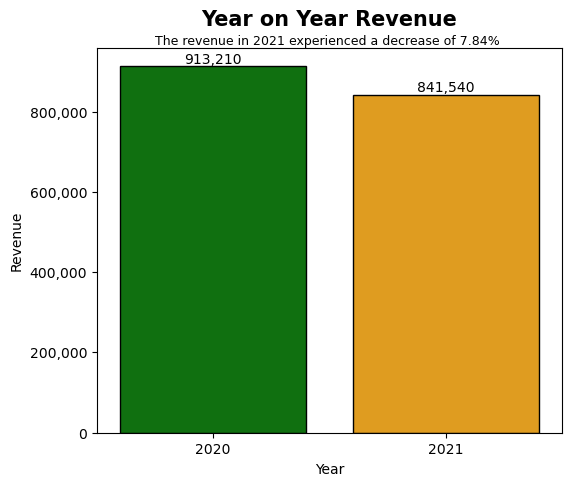

In [14]:
# Plotting revenue based on year
fig, ax = plt.subplots(figsize = (6,5))
plt.ticklabel_format(style = 'plain')
ax = sns.barplot( x = 'Year', y = 'TotalSales', data = df_year, palette = {2020: 'green', 2021 : 'orange'}, edgecolor = 'black')

# Format y axis to comma with StrMethodFormatter
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# Bar label
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}')

# Changing x and y label
ax.set_xlabel('Year', fontsize = 10)
ax.set_ylabel('Revenue', fontsize = 10)

# Add title and subtitle
ax.set_title('Year on Year Revenue', pad = 16, fontsize = 15, fontweight = 'bold')
ax.text(x = -0.25, y = 967000, s = 'The revenue in 2021 experienced a decrease of 7.84%', fontsize = 9)
plt.show



In [15]:
# Add a column for month

def getMonth(DateOrder):
    return(DateOrder.strftime('%B'))
df_1['Month'] = df['DateOrder'].apply(getMonth)
df_1.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_18060\3389143486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Month'] = df['DateOrder'].apply(getMonth)


,OrderID,Year,DateOrder,CustomerID,Name,CustomerEmail,CustomerPhone,CustomerCity,CategoryName,ProdName,Quantity,Price,TotalSales,Month
0,1,2020,2020-01-01,1866,Farrand Vasler,fvaslerqt@comsenz.com#mailto:fvaslerqt@comsenz...,601-786-0195,Jackson,eBooks,Polar Robots,2,23.99,47.98,January
1,58,2020,2020-01-12,46,Dill Gyrgorcewicx,dgyrgorcewicx5@1und1.de#mailto:dgyrgorcewicx5@...,918-471-3145,Tulsa,eBooks,Polar Robots,4,23.99,95.96,January
2,63,2020,2020-01-13,1101,Lotti Cridlon,lcridlonkj@sina.com.cn#mailto:lcridlonkj@sina....,217-724-8971,Springfield,eBooks,Polar Robots,1,23.99,23.99,January
3,73,2020,2020-01-15,700,Roobbie Dermot,rdermotm7@spotify.com#mailto:rdermotm7@spotify...,202-245-2944,Washington,eBooks,Polar Robots,3,23.99,71.97,January
4,1764,2021,2021-01-16,1052,Row Hebner,rhebner7v@hugedomains.com#mailto:rhebner7v@hug...,714-296-4939,Irvine,eBooks,Polar Robots,2,23.99,47.98,January


In [16]:
df_2 = df_1[['OrderID', 'Year', 'DateOrder','Month','CustomerID', 'Name', 'CustomerEmail', 'CustomerPhone', 'CustomerCity', 'CategoryName', 'ProdName','Quantity', 'Price', 'TotalSales']]
df_2.head()

,OrderID,Year,DateOrder,Month,CustomerID,Name,CustomerEmail,CustomerPhone,CustomerCity,CategoryName,ProdName,Quantity,Price,TotalSales
0,1,2020,2020-01-01,January,1866,Farrand Vasler,fvaslerqt@comsenz.com#mailto:fvaslerqt@comsenz...,601-786-0195,Jackson,eBooks,Polar Robots,2,23.99,47.98
1,58,2020,2020-01-12,January,46,Dill Gyrgorcewicx,dgyrgorcewicx5@1und1.de#mailto:dgyrgorcewicx5@...,918-471-3145,Tulsa,eBooks,Polar Robots,4,23.99,95.96
2,63,2020,2020-01-13,January,1101,Lotti Cridlon,lcridlonkj@sina.com.cn#mailto:lcridlonkj@sina....,217-724-8971,Springfield,eBooks,Polar Robots,1,23.99,23.99
3,73,2020,2020-01-15,January,700,Roobbie Dermot,rdermotm7@spotify.com#mailto:rdermotm7@spotify...,202-245-2944,Washington,eBooks,Polar Robots,3,23.99,71.97
4,1764,2021,2021-01-16,January,1052,Row Hebner,rhebner7v@hugedomains.com#mailto:rhebner7v@hug...,714-296-4939,Irvine,eBooks,Polar Robots,2,23.99,47.98


In [17]:
# Grouping total sales for each month and year

df_month = df_2.groupby(['Year', 'Month']).agg({'TotalSales' : 'sum'}).reset_index()
df_month.head()

,Year,Month,TotalSales
0,2020,April,66986.64
1,2020,August,85316.33
2,2020,December,73031.10
3,2020,February,74764.52
4,2020,January,87478.32


In [18]:
sort_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_month.index = pd.CategoricalIndex(df_month['Month'],categories=sort_order,ordered=True)
df_month = df_month.sort_index().reset_index(drop=True)
df_month.head()

,Year,Month,TotalSales
0,2020,January,87478.32
1,2021,January,78479.05
2,2020,February,74764.52
3,2021,February,72040.18
4,2020,March,74807.77


<function matplotlib.pyplot.show(close=None, block=None)>

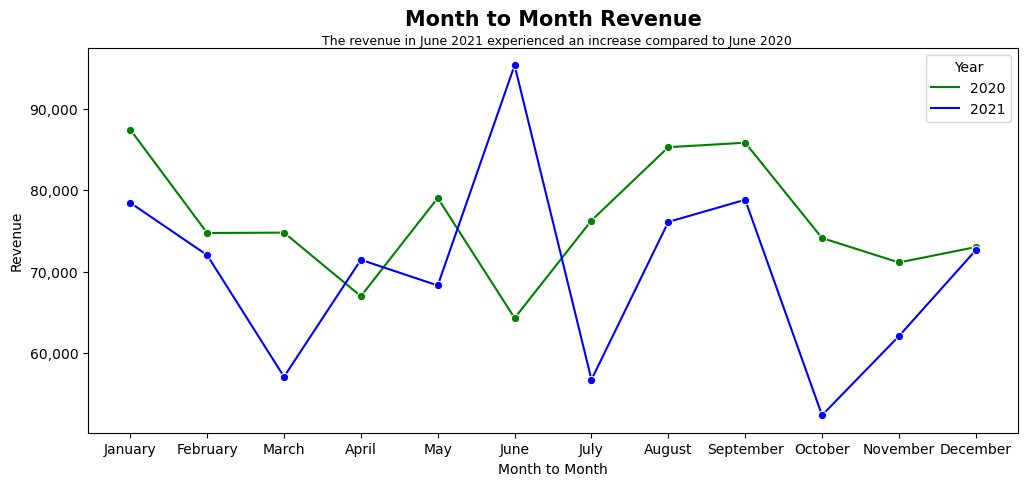

In [19]:
# Plotting total sales for each month and year

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x = 'Month', y = 'TotalSales', data = df_month, hue = 'Year', palette = {2020: 'green', 2021 : 'blue'}, marker = 'o' )
# format y axis to comma with StrMethodFormatter
ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))


# Changing x, y label
ax.set_xlabel('Month to Month', fontsize = 10)
ax.set_ylabel('Revenue', fontsize = 10)

# Add title and subtitle
ax.set_title('Month to Month Revenue', pad = 16, fontsize = 15, fontweight = 'bold')
ax.text(x = 2.5, y = 98000, s = 'The revenue in June 2021 experienced an increase compared to June 2020', fontsize = 9)
plt.show



Text(0.5, 1.0, 'Distribution of Prices')

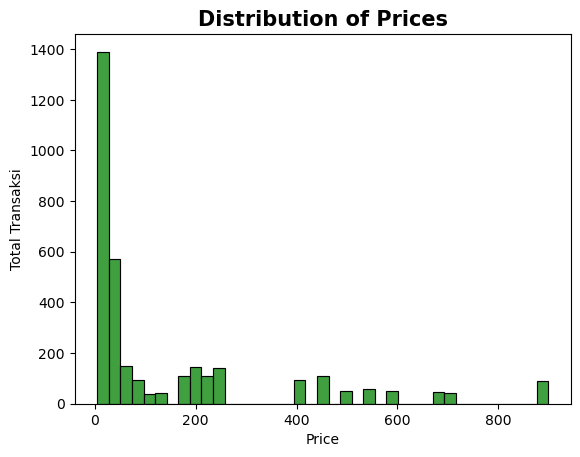

In [20]:
# Distribution of price
fig, ax = plt.subplots()
ax = sns.histplot( x = 'Price', data = df, color = 'green')
ax.set_xlabel('Price', fontsize = 10)
ax.set_ylabel('Total Transaksi', fontsize = 10)
ax.set_title('Distribution of Prices', fontsize = 15, fontweight = 'bold')

In [21]:
df_1.describe()

,OrderID,Year,CustomerID,Quantity,Price,TotalSales
count,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000
mean,1670.000299,2020.492962,1064.098832,3.490267,149.051653,525.531767
std,964.031120,0.500025,605.733104,1.328179,214.816955,843.330373
min,1.000000,2020.000000,1.000000,1.000000,4.990000,4.990000
25%,835.500000,2020.000000,543.500000,3.000000,16.990000,58.500000
50%,1670.000000,2020.000000,1054.000000,3.000000,37.990000,128.970000
75%,2504.500000,2021.000000,1587.000000,5.000000,189.000000,642.000000
max,3340.000000,2021.000000,2123.000000,6.000000,899.000000,5394.000000


In [22]:
# Check uniq customer

df_uniq = df_1.groupby('Year').agg({'CustomerID' : 'nunique'}).reset_index()
df_uniq

,Year,CustomerID
0,2020,1151
1,2021,1147


Text(0.5, 1.0, 'Total Customers by Year')

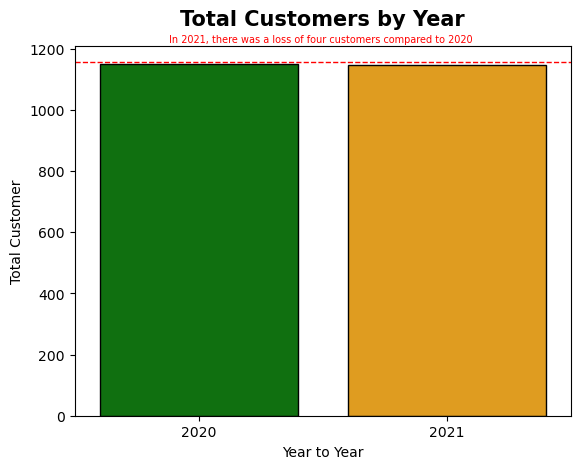

In [23]:
# Plotting total customers by year

fig, ax = plt.subplots()
ax = sns.barplot(x = 'Year', y = 'CustomerID', data = df_uniq, palette = {2020 : 'green', 2021 : 'orange'}, edgecolor = 'black')
plt.axhline(y = 1155, color = 'red', linewidth = 1, linestyle = '--')
ax.text(x = -0.12, y = 1220, s = 'In 2021, there was a loss of four customers compared to 2020', fontsize = 7, color = 'red')
ax.set_xlabel('Year to Year')
ax.set_ylabel('Total Customer')
ax.set_title('Total Customers by Year', fontsize = 15, fontweight = 'bold', pad = 15)


In [24]:
df_1.head()

,OrderID,Year,DateOrder,CustomerID,Name,CustomerEmail,CustomerPhone,CustomerCity,CategoryName,ProdName,Quantity,Price,TotalSales,Month
0,1,2020,2020-01-01,1866,Farrand Vasler,fvaslerqt@comsenz.com#mailto:fvaslerqt@comsenz...,601-786-0195,Jackson,eBooks,Polar Robots,2,23.99,47.98,January
1,58,2020,2020-01-12,46,Dill Gyrgorcewicx,dgyrgorcewicx5@1und1.de#mailto:dgyrgorcewicx5@...,918-471-3145,Tulsa,eBooks,Polar Robots,4,23.99,95.96,January
2,63,2020,2020-01-13,1101,Lotti Cridlon,lcridlonkj@sina.com.cn#mailto:lcridlonkj@sina....,217-724-8971,Springfield,eBooks,Polar Robots,1,23.99,23.99,January
3,73,2020,2020-01-15,700,Roobbie Dermot,rdermotm7@spotify.com#mailto:rdermotm7@spotify...,202-245-2944,Washington,eBooks,Polar Robots,3,23.99,71.97,January
4,1764,2021,2021-01-16,1052,Row Hebner,rhebner7v@hugedomains.com#mailto:rhebner7v@hug...,714-296-4939,Irvine,eBooks,Polar Robots,2,23.99,47.98,January


In [25]:
# Perform a multi-groupby operation on customerID and year, aggregating the count of orderID

df_cust = df_1.groupby(['CustomerID', 'Year']).agg({'OrderID' :'count'}).reset_index()
df_cust.head()

,CustomerID,Year,OrderID
0,1,2021,2
1,2,2021,1
2,3,2020,1
3,5,2020,1
4,5,2021,1


In [26]:
# Pivot customers
pivot_cust = pd.pivot_table(df_cust,
                            index = ['CustomerID'],
                            columns = ['Year'],
                            values = ['OrderID'])
pivot_cust.head()

OrderID     
Year          2020 2021
CustomerID             
1              NaN  2.0
2              NaN  1.0
3              1.0  NaN
5              1.0  1.0
6              2.0  NaN

In [27]:
pivot_cust.columns = ['_'.join(str(s).strip() for s in col if s) for col in pivot_cust.columns]

In [28]:
pivot_cust.reset_index()

,CustomerID,OrderID_2020,OrderID_2021
0,1,NaN,2.0
1,2,NaN,1.0
2,3,1.0,NaN
3,5,1.0,1.0
4,6,2.0,NaN
...,...,...,...
1666,2116,NaN,2.0
1667,2119,2.0,2.0
1668,2120,2.0,2.0
1669,2121,1.0,NaN


In [29]:
# Sorting new customer in 2021

df_2020null = pivot_cust[(pivot_cust['OrderID_2020'].isnull()) & (pivot_cust['OrderID_2021'] > 0)]
df_2020null

,OrderID_2020,OrderID_2021
CustomerID,,
1,NaN,2.0
2,NaN,1.0
7,NaN,1.0
13,NaN,2.0
14,NaN,2.0
...,...,...
2105,NaN,2.0
2108,NaN,2.0
2111,NaN,1.0


In [30]:
# ID Customer with 0 revenue in 2021

df_2021null = pivot_cust[(pivot_cust['OrderID_2021'].isnull()) & (pivot_cust['OrderID_2020'] > 0)]
df_2021null

,OrderID_2020,OrderID_2021
CustomerID,,
3,1.0,NaN
6,2.0,NaN
8,1.0,NaN
11,1.0,NaN
12,1.0,NaN
...,...,...
2109,3.0,NaN
2114,2.0,NaN
2115,2.0,NaN


In [31]:
# the highest number of customers who did not make a repurchase in 2021

df_2021null[df_2021null['OrderID_2020'] == 5]

,OrderID_2020,OrderID_2021
CustomerID,,
422,5.0,NaN


In [32]:
# Royal customers

df_royalcust = pivot_cust[(pivot_cust['OrderID_2021'] > 0) & (pivot_cust['OrderID_2020'] > 0)]
df_royalcust

,OrderID_2020,OrderID_2021
CustomerID,,
5,1.0,1.0
9,1.0,2.0
10,2.0,1.0
18,1.0,1.0
20,2.0,2.0
...,...,...
2103,1.0,2.0
2104,2.0,2.0
2110,1.0,1.0


In [33]:
# Sorting the royal customers from the highest
df_royalcust.sort_values('OrderID_2021', ascending = False)

,OrderID_2020,OrderID_2021
CustomerID,,
496,1.0,5.0
1016,2.0,4.0
1406,1.0,4.0
504,1.0,4.0
1389,2.0,3.0
...,...,...
1069,2.0,1.0
1064,1.0,1.0
1063,1.0,1.0


In [34]:
# Perform a multi-groupby operation on category name and year, aggregating the sum of quantity

df_product = df_1.groupby(['CategoryName', 'Year']).agg({'Quantity' : 'sum'}).reset_index()
df_product

,CategoryName,Year,Quantity
0,Blueprints,2020,867
1,Blueprints,2021,751
2,Drone Kits,2020,779
3,Drone Kits,2021,736
4,Drones,2020,600
5,Drones,2021,627
6,Robot Kits,2020,548
7,Robot Kits,2021,489
8,Robots,2020,577
9,Robots,2021,476


Text(1205, -0.6, 'except for Drones and E-Books')

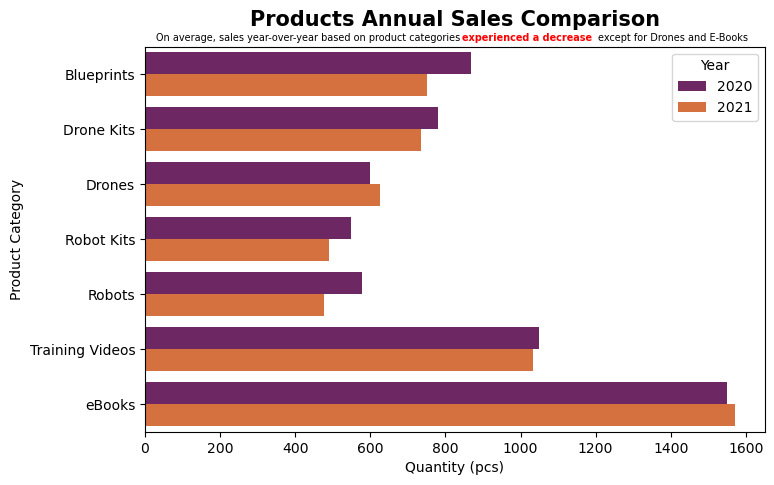

In [35]:
# Plotting products annual sales comparison

fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(y = 'CategoryName', x = 'Quantity', data = df_product, hue = 'Year', orient = 'h', palette = 'inferno')
ax.set_xlabel('Quantity (pcs)')
ax.set_ylabel('Product Category')
ax.set_title('Products Annual Sales Comparison', fontsize = 15, fontweight = 'bold', pad = 15)
ax.text(x = 30, y = -0.6, s = 'On average, sales year-over-year based on product categories', fontsize = 7)
ax.text(x = 845, y = -0.6, s = 'experienced a decrease', color = 'red', fontweight = 'bold', fontsize = 7)
ax.text(x = 1205, y = -0.6, s = 'except for Drones and E-Books', fontsize = 7)




In [36]:
# Customers location
df_city = df_1.groupby(['CustomerCity', 'Year']).agg({'CustomerID' :'nunique'}).reset_index()
df_city.head()

,CustomerCity,Year,CustomerID
0,Abilene,2020,3
1,Aiken,2020,1
2,Akron,2020,4
3,Akron,2021,2
4,Albany,2020,7


In [37]:
pivot_city = pd.pivot_table(df_city,
                            index = ['CustomerCity'],
                            columns = ['Year'],
                            values = ['CustomerID'])
pivot_city

CustomerID     
Year                2020 2021
CustomerCity                 
Abilene              3.0  NaN
Aiken                1.0  NaN
Akron                4.0  2.0
Albany               7.0  9.0
Albuquerque          5.0  5.0
...                  ...  ...
Yakima               1.0  1.0
York                 NaN  1.0
Young America        6.0  5.0
Youngstown           4.0  2.0
Zephyrhills          2.0  1.0

[361 rows x 2 columns]

In [38]:
pivot_city.columns = ['_'.join(str(s).strip() for s in col if s) for col in pivot_city.columns]

In [39]:
pivot_city.reset_index()

,CustomerCity,CustomerID_2020,CustomerID_2021
0,Abilene,3.0,NaN
1,Aiken,1.0,NaN
2,Akron,4.0,2.0
3,Albany,7.0,9.0
4,Albuquerque,5.0,5.0
...,...,...,...
356,Yakima,1.0,1.0
357,York,NaN,1.0
358,Young America,6.0,5.0
359,Youngstown,4.0,2.0


In [40]:
# New customer base cities
df_2020nullcity = pivot_city[(pivot_city['CustomerID_2020'].isnull()) & (pivot_city['CustomerID_2021'] > 0)]
df_2020nullcity.head()

,CustomerID_2020,CustomerID_2021
CustomerCity,,
Augusta,NaN,1.0
Beaumont,NaN,1.0
Bethesda,NaN,1.0
Bradenton,NaN,2.0
Edmond,NaN,1.0


In [41]:
df_2020nullcity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, Augusta to York
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID_2020  0 non-null      float64
 1   CustomerID_2021  38 non-null     float64
dtypes: float64(2)
memory usage: 912.0+ bytes


In [42]:
# Reduction in cities compared to the previous year
df_2021nullcity = pivot_city[(pivot_city['CustomerID_2021'].isnull()) & (pivot_city['CustomerID_2020'] > 0)]
df_2021nullcity.head(10)

,CustomerID_2020,CustomerID_2021
CustomerCity,,
Abilene,3.0,NaN
Aiken,1.0,NaN
Ann Arbor,1.0,NaN
Apache Junction,1.0,NaN
Asheville,1.0,NaN
Beaverton,2.0,NaN
Billings,2.0,NaN
Biloxi,1.0,NaN
Bloomington,3.0,NaN


In [43]:
df_2021nullcity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Abilene to Wilkes Barre
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID_2020  47 non-null     float64
 1   CustomerID_2021  0 non-null      float64
dtypes: float64(2)
memory usage: 1.1+ KB


In [44]:
# Royal customers cities
df_royalcity = pivot_city[(pivot_city['CustomerID_2021'] > 0) & (pivot_city['CustomerID_2020'] > 0)]
df_royalcity

,CustomerID_2020,CustomerID_2021
CustomerCity,,
Akron,4.0,2.0
Albany,7.0,9.0
Albuquerque,5.0,5.0
Alexandria,2.0,1.0
Alhambra,1.0,1.0
...,...,...
Worcester,1.0,2.0
Yakima,1.0,1.0
Young America,6.0,5.0


In [45]:
# Cities with royal customers showing customer growth
df_citygrowthpositif = pivot_city[(pivot_city['CustomerID_2021']) > (pivot_city['CustomerID_2020'])]
df_citygrowthpositif.sort_values('CustomerID_2021', ascending = False)

,CustomerID_2020,CustomerID_2021
CustomerCity,,
Houston,23.0,30.0
San Diego,16.0,20.0
El Paso,12.0,18.0
Phoenix,13.0,15.0
Philadelphia,10.0,14.0
...,...,...
North Hollywood,1.0,2.0
North Las Vegas,1.0,2.0
North Little Rock,1.0,2.0


In [46]:
# Cities with a decline in royal customers
df_citygrowthnegatif = pivot_city[(pivot_city['CustomerID_2021']) < (pivot_city['CustomerID_2020'])]
df_citygrowthnegatif.sort_values('CustomerID_2021', ascending = False)

,CustomerID_2020,CustomerID_2021
CustomerCity,,
Washington,34.0,31.0
Chicago,15.0,14.0
Springfield,14.0,13.0
Atlanta,21.0,13.0
Denver,15.0,13.0
...,...,...
Miami Beach,2.0,1.0
Monticello,2.0,1.0
Muncie,2.0,1.0
